# Dataset loading   
Download the publicly availible data set: https://data.mendeley.com/datasets/5y9wdsg2zt/2


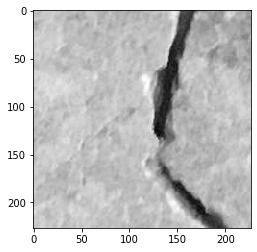

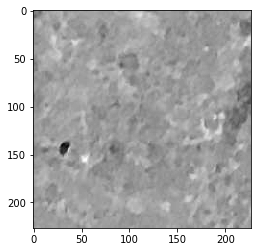

In [16]:
import numpy as np
import matplotlib.pyplot as plt 
import os
import cv2 
import shutil  

DATADIR= "/Users/tasiabueno/Documents/Thesis/Data/Concrete_Crack" # Insert the directory of where the data-set is stored
CATEGORIES = ["Negative", "Positive"] # Directory to the postive and negative images

for category in CATEGORIES:
    path_n = os.path.join(DATADIR,CATEGORIES[0])
    path_p = os.path.join(DATADIR,CATEGORIES[1])

for img in os.listdir(path_p):
        img_array_p = cv2.imread(os.path.join(path_p,img), cv2.IMREAD_GRAYSCALE) 
        plt.imshow(img_array_p, cmap="gray") # Greyscale 
        plt.show()
        break   
for img in os.listdir(path_n):
        img_array_n = cv2.imread(os.path.join(path_n,img), cv2.IMREAD_GRAYSCALE)
        plt.imshow(img_array_n, cmap="gray") # Greyscale
        plt.show()
        break


## Image data code
 The above code, loads in the image data and shows an image of cracked and non cracked concrete structure. The breaks are needed otherwise the whole data set is loaded in to the space and all the image are shown, we just show an example of 2 images, one cracked (positive) and one non-cracked (negative)


# Data  preparation
The next section will be used to prepare the data for the CNN, cleaning, reshaping, transformation etc. 

In [188]:
# Take a look at the size of the image dataset, of each class, the size of the image, pixel values etc.
SIZE = 50
# create a binary index for postive and negative for the classification of negative and postivive
import random #need shuffle the data otherwise the network will not learn properly 
complete_data = []
def create_complete_data():
    for category in CATEGORIES:
        path = os.path.join(DATADIR, category) # path 
        class_num = CATEGORIES.index(category) # 0/1 indexing 
        for img in os.listdir(path): #loop over all the images
            img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE) #transform the data to greyscale 
            #new_array = cv2.resize(img_array, (SIZE,SIZE)) #resize all the images 
            complete_data.append([img_array, class_num]) 
create_complete_data()
# Random shuffle the data 
random.shuffle(complete_data) 

In [ ]:
#test the split up in training & test set 
test_data = []
print(sum(complete_data[1]))
print(len(complete_data))
test_data = complete_data[:]


X=[] #features set
y=[] #label set
for features,label in test_data:
    X.append(features) #List, we need to transfrom into an array as NN cannot accept lists
    y.append(label) 